In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('/content/diabetes - diabetes.csv')

# Display first and last 10 records
print("First 10 records:")
print(df.head(10))
print("\nLast 10 records:")
print(df.tail(10))


First 10 records:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3            


Non-Null Counts and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Dataset Description:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.8945

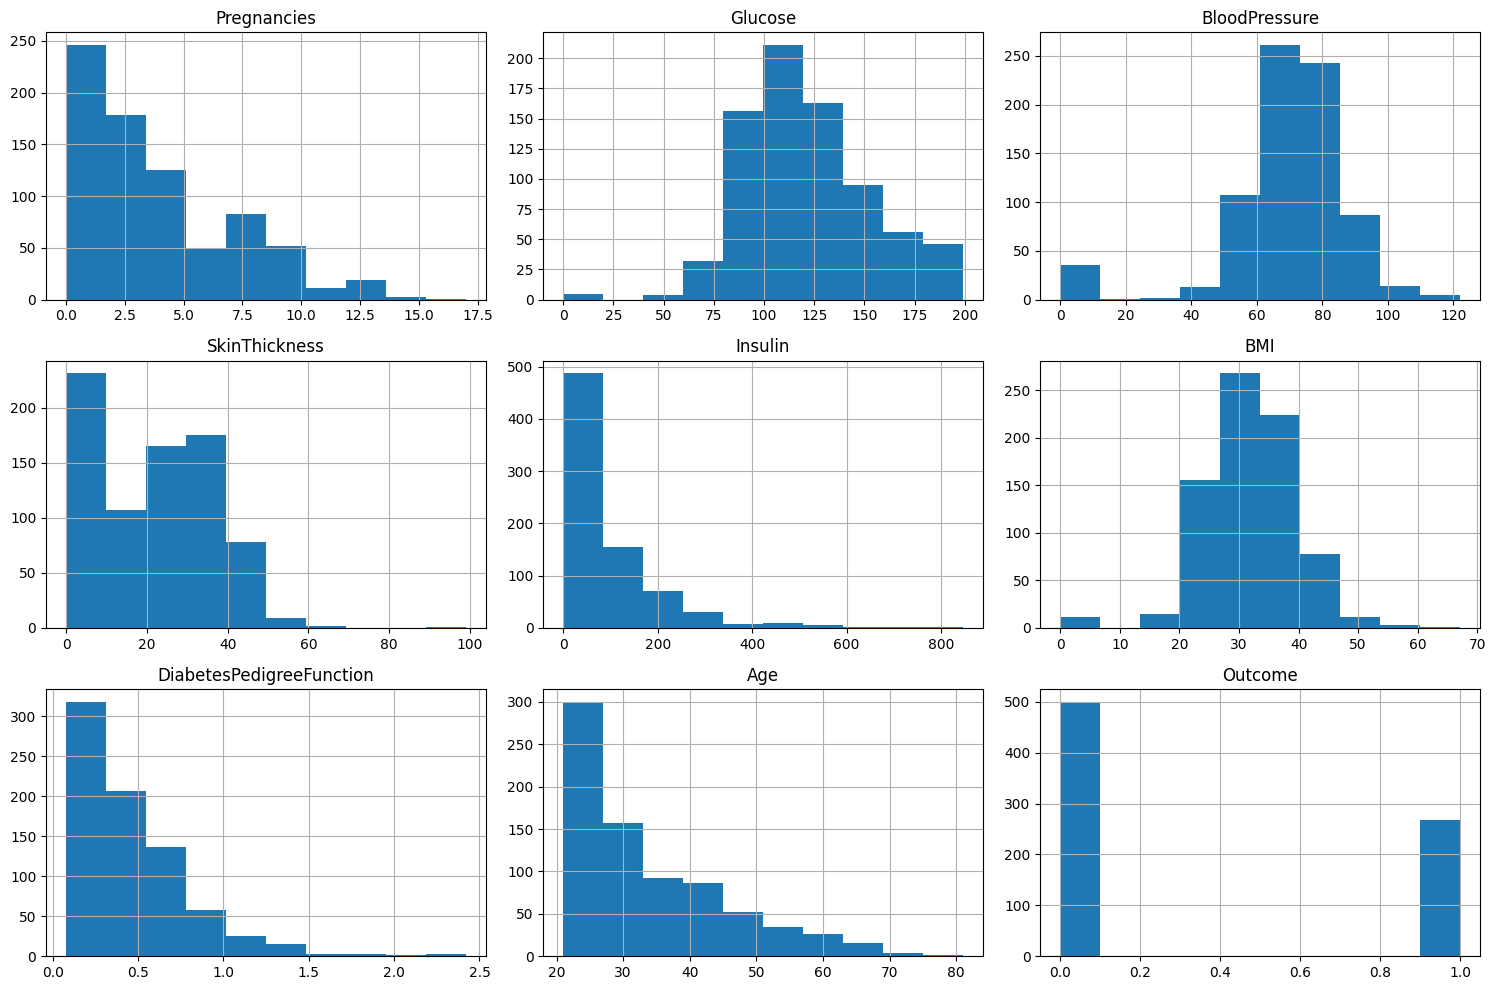

In [3]:
# Count Non-Null Values and Display Data Types
print("\nNon-Null Counts and Data Types:")
print(df.info())

# Dataset description
print("\nDataset Description:")
print(df.describe())

# Draw histogram plots for individual features
df.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [4]:
# Normalize the dataset
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("\nNormalized Data:")
print(df_scaled.head())



Normalized Data:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      1.0  


In [5]:
# Split the dataset into features and target variable
X = df_scaled.drop('Outcome', axis=1)  # Features
y = df_scaled['Outcome']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Test Data Shapes:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)



Training and Test Data Shapes:
X_train shape: (614, 8)
X_test shape: (154, 8)


In [6]:
# Create the logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

print("\nModel Training Complete.")


Model Training Complete.


In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")


Confusion Matrix:
[[86 13]
 [23 32]]

Performance Metrics:
Accuracy: 0.77
Precision: 0.71
Recall: 0.58
F1 Score: 0.64
AUC: 0.73


In [11]:

new_data = np.array([[5, 116, 74, 0, 0, 25.6, 0.201, 30]])

new_data_scaled = scaler.transform(new_data)

prediction = model.predict(new_data_scaled)
prediction_proba = model.predict_proba(new_data_scaled)

print("\nPrediction for new input (0: non-diabetic, 1: diabetic):", prediction[0])
print("Prediction Probability:", prediction_proba)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but MinMaxScaler is expecting 9 features as input.